In [1]:
%cd ..

C:\Users\euare\repositories\cpc


In [2]:
from src.api import *
from src.curveproduction.cost_potential_curve import *
from src.homogenize import create_cost_potential_curve_pp_input
from src.tools.config_loader import Configuration
from src.curveproduction.cost_potential_curve import *
import matplotlib.pyplot as plt
import numpy as np
import warnings

#config = Configuration.get_instance()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


#  Testing the effect of cost value boundaries

In [ ]:
config.set_value("reference_value", "InputHomogenization", "CostLevel")
create_cost_potential_curve_pp_input()
distribution = cost_emission_distribution(["basic", "iron", "cement"])
distribution.plot()

In [ ]:
config.set_value("range_low", "InputHomogenization", "CostLevel")
create_cost_potential_curve_pp_input()
distribution_low = cost_emission_distribution(["basic"])
distribution_low.plot()

In [ ]:
config.set_value("range_high", "InputHomogenization", "CostLevel")
create_cost_potential_curve_pp_input()
distribution_high = cost_emission_distribution(["basic"])
distribution_high.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
curve_ref = CostCurve.from_distribution(distribution)
curve_low = CostCurve.from_distribution(distribution_low)
curve_high = CostCurve.from_distribution(distribution_high)
curve_ref.plot(ax, label = "Reference")
curve_low.plot(ax, label = "Low")
curve_high.plot(ax, label = "High")

#  Testing the effect of cost capture efficiency

Note: Capture efficiency for steel is constrained by the study specifications, everything else has a capture efficiency assigned based on various literature values, this can be varied

In [10]:
parameter_config_map= {
    "cost": [ "InputHomogenization", "CostLevel"],
    "heatratechange": [ "InputHomogenization", "HRLevel"],
    "capefficiency": ["InputHomogenization", "CostOfCCConfig", "DefaultValues", "CaptureEfficiency"],
    "capacityfactor_bio": ["InputHomogenization", "CostOfCCConfig", "DefaultValues", "CapacityFactor", "Bioenergy"],
    "capacityfactor_hc": ["InputHomogenization", "CostOfCCConfig", "DefaultValues", "CapacityFactor", "Hard Coal"],
    "capacityfactor_lg": ["InputHomogenization", "CostOfCCConfig", "DefaultValues", "CapacityFactor", "Lignite"],
    "capacityfactor_ng": ["InputHomogenization", "CostOfCCConfig", "DefaultValues", "CapacityFactor", "Natural Gas"]
} 

CF_structure= { "Bioenergy": 0.3,
        "Hard Coal": 0.5,
        "Lignite": 0.75,
        "Natural Gas": 0.4 } 

CF_low= { "Bioenergy": 0.3,
        "Hard Coal": 0.4,
        "Lignite": 0.5,
        "Natural Gas": 0.3 } 

CF_mid= { "Bioenergy": 0.4,
        "Hard Coal": 0.6,
        "Lignite": 0.6,
        "Natural Gas": 0.5 } 

CF_high= { "Bioenergy": 0.5,
        "Hard Coal": 0.75,
        "Lignite": 0.75,
        "Natural Gas": 0.6 } 


parameter_levels= {
    "cost": ["range_low", "reference_value", "range_high"],
    "heatratechange": ["range_low", "reference_value", "range_high"],
    "capefficiency": np.linspace(0,1,9),
    "capacityfactor": [CF_low, CF_mid, CF_high],
    "capacityfactor_bio": np.linspace(0.3,0.6,3),
    "capacityfactor_hc": np.linspace(0.4,0.8,3),
    "capacityfactor_lg": np.linspace(0.5,0.8,3),
    "capacityfactor_ng": np.linspace(0.4,0.6,3)
}
def set_config_parameters(level, parameter):
    config.set_value(level, *parameter_config_map[parameter])
    return

def sensitivity_distributions(parameter):
    levels = parameter_levels[parameter]
    distributions= {}
    for level in levels:
        set_config_parameters(level, parameter)
        create_cost_potential_curve_pp_input()
        distributions[level] = cost_emission_distribution(["basic"])
    return distributions

def plot_comparative_plots(distributions):
    fig, ax = plt.subplots(figsize=(12,10))
    for idx in distributions:
        curve= CostCurve.from_distribution(distributions[idx])
        curve.plot(ax, label = idx)
    plt.show()

def sensitivity_distributions_cf(parameters):
    levels = np.array([parameter_levels[p] for p in parameters])
    distributions= {}
    for i in range(levels.shape[1]):   
        for j, par in enumerate(parameters):
            set_config_parameters(levels[j,i], par)
        create_cost_potential_curve_pp_input()
        distributions["Level: {}".format(i)] = cost_emission_distribution(["basic"])
    return distributions
        

In [ ]:
config.reset_values()
with warnings.catch_warnings():
    ceff_level_dististributions = sensitivity_distributions("capefficiency")
    plot_comparative_plots(ceff_level_dististributions)

In [ ]:
with warnings.catch_warnings():
    cost_level_dististributions = sensitivity_distributions("cost")
    plot_comparative_plots(cost_level_dististributions)

INFO:root:The configuration values have been reset


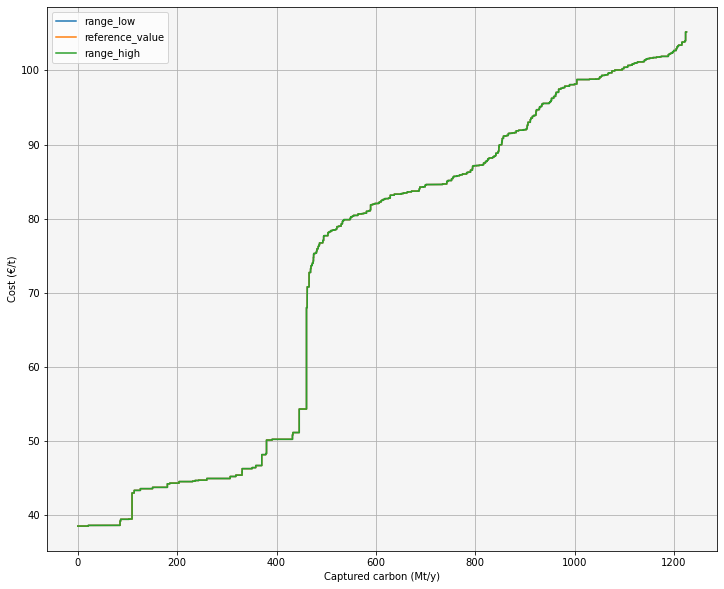

In [16]:
config.reset_defaults()
del config
config = Configuration()
with warnings.catch_warnings():
    hr_level_dististributions = sensitivity_distributions("heatratechange")
    plot_comparative_plots(hr_level_dististributions)

In [ ]:
config.reset_defaults()
del config
config = Configuration()
with warnings.catch_warnings():
    cf_level_dististributions = sensitivity_distributions_cf(["capacityfactor_bio",
    "capacityfactor_hc",
    "capacityfactor_lg",
    "capacityfactor_ng"]
                            )
    plot_comparative_plots(cf_level_dististributions)

# Extreme cases

In [ ]:
set_config_parameters("range_low", "cost")
set_config_parameters("range_high", "heatratechange")
set_config_parameters(0.9,"capefficiency")
set_config_parameters(0.3,"capacityfactor_bio")
set_config_parameters(0.4,"capacityfactor_hc")
set_config_parameters(0.5,"capacityfactor_lg")
set_config_parameters(0.4,"capacityfactor_ng")

create_cost_potential_curve_pp_input()
distribution_low = cost_emission_distribution(["basic", "iron", "cement"], territories= ["DE"])

fig, ax = plt.subplots(figsize=(12,10))
curve_low= CostCurve.from_distribution(distribution_low)
curve_low.plot(ax, label = "low")

set_config_parameters("range_high", "cost")
set_config_parameters("range_low", "heatratechange")
set_config_parameters(0.9,"capefficiency")
set_config_parameters(0.6,"capacityfactor_bio")
set_config_parameters(0.8,"capacityfactor_hc")
set_config_parameters(0.8,"capacityfactor_lg")
set_config_parameters(0.6,"capacityfactor_ng")

create_cost_potential_curve_pp_input()
distribution_high = cost_emission_distribution(["basic", "iron", "cement"], territories= ["DE"])
curve_high= CostCurve.from_distribution(distribution_high)
curve_high.plot(ax, label = "high")

set_config_parameters("reference_value", "cost")
set_config_parameters("reference_value", "heatratechange")
set_config_parameters(0.9,"capefficiency")
set_config_parameters(0.4,"capacityfactor_bio")
set_config_parameters(0.6,"capacityfactor_hc")
set_config_parameters(0.6,"capacityfactor_lg")
set_config_parameters(0.5,"capacityfactor_ng")

create_cost_potential_curve_pp_input()
distribution_ref = cost_emission_distribution(["basic", "iron", "cement"], territories= ["DE"])
curve_ref= CostCurve.from_distribution(distribution_ref)
curve_ref.plot(ax, label = "ref")

plt.show()

In [ ]:
parameter_levels= {
    "cost": ["range_low", "reference_value", "range_high"],
    "heatratechange": ["range_low", "reference_value", "range_high"],
    "capefficiency": np.linspace(0,1,9),
    "capacityfactor": [CF_low, CF_mid, CF_high],
    "capacityfactor_bio": np.linspace(0.3,0.6,3),
    "capacityfactor_hc": np.linspace(0.4,0.8,3),
    "capacityfactor_lg": np.linspace(0.5,0.8,3),
    "capacityfactor_ng": np.linspace(0.4,0.6,3)
}

In [ ]:
colors_low = {"Cement": "#95a9b7",
          "IronSteel": "#d2edf9",
          "Lignite": "#ebccad",
          "Bioenergy": "#98e698",
          "Hard Coal": "#666666",
          "Natural Gas": "#ff0000"}

colors_high = {"Cement": "#151a1e",
          "IronSteel": "#1783b5",
          "Lignite": "#674019",
          "Bioenergy": "#0f3e0f",
          "Hard Coal": "#000000",
          "Natural Gas": "#800000"}

colors_mid = {"Cement": "#36454F",
          "IronSteel": "#89CFF0",
          "Lignite": "#CD7F32",
          "Bioenergy": "#228B22",
          "Hard Coal": "#000000",
          "Natural Gas": "#800000"}

uniques = curve_ref.curve.source.unique()
data_ref= curve_ref.curve
data_low= curve_low.curve
data_high= curve_high.curve

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import cm
from matplotlib.lines import Line2D
from matplotlib import rc
rc('text', usetex=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.grid(axis="y", linestyle= "--", color = "black", dashes=(5, 10), linewidth=1, zorder=0)
ax.set_axisbelow(True)
def color_plot(data, ax, colors, alpha=1, color = "black"):
    uniques = data.source.unique()
    for source in uniques:    
        ax.fill_between(data["amount"], data["cost"], where=data.source == source, facecolor= colors[source], alpha = alpha)
    ax.plot(data["amount"], data["cost"], color = color, linewidth=2)    
    custom_lines = [Line2D([0], [0], color=c, lw=4) for k, c in colors.items()]
    #ax.set_xlim([0,max(data["amount"])])
    #ax.set_ylim([0,max(data["cost"])])
    ax.set_facecolor('#CCCCFF')
    ax.legend(custom_lines, [k for k in colors.keys()], framealpha=0.5)
    ax.set_title("Cost and potential of captured CO2")
    ax.set_ylabel("Cost - €/tCO2")
    ax.set_xlabel("Potential - MtCO2/a")
    

ax.set_xlim([0,350])
ax.set_ylim([0,140])
color_plot(data_high, ax, colors_mid, 1, "red")
color_plot(data_ref, ax, colors_mid, 1, "white")
color_plot(data_low, ax, colors_mid, 1, "blue")

In [ ]:
import seaborn as sns
test_d = ceff_level_dististributions[1].data
test_d2 = ceff_level_dististributions[ 0.875].data
ax = sns.boxplot(data = test_d, y = "cost")
sns.boxplot(data = test_d2, y = "cost", ax = ax)

In [ ]:
df = pd.DataFrame(index = ceff_level_dististributions[0].data.index )
df["column"] =  ceff_level_dististributions[0].data.cost
print(df)

In [ ]:
def columns_for_boxplot(collection, column):
    keys = list(collection.keys())
    df = pd.DataFrame(index = collection[keys[0]].data.index )
    for distribution in collection:
        df["{}".format(distribution)]= collection[distribution].data[column]
    return df

In [ ]:
dummy = columns_for_boxplot(ceff_level_dististributions, "cost")
sns.boxplot(data = dummy)

In [ ]:
dummy = columns_for_boxplot(cost_level_dististributions, "cost")
sns.boxplot(data = dummy)

In [ ]:
dummy = columns_for_boxplot(hr_level_dististributions, "cost")
sns.boxplot(data = dummy)

In [ ]:
dummy = columns_for_boxplot(cf_level_dististributions, "cost")
sns.boxplot(data = dummy)

In [ ]:
config.__dict__

In [ ]:
set_config_parameters("range_high", "cost")
set_config_parameters("range_low", "heatratechange")
config.__dict__

In [ ]:
config.reset_values()
config.__dict__

In [ ]:
config.reset_defaults()
config.__dict__

In [ ]:
Configuration.__dict__

In [ ]:
config.__instance

In [4]:
config.reset_defaults()

INFO:root:The configuration values have been reset


In [6]:
del config

In [8]:
Configuration()

In [15]:
config = Configuration.get_instance()